# Battle of The Neighborhood

In [1]:
!pip install geopy
!pip install geocoder
!pip install folium

import numpy as np
import pandas as pd
import json
from geopy.geocoders import Nominatim
import geocoder
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize
from sklearn.metrics import silhouette_score

%matplotlib notebook

print('Import done')

Import done


In [2]:
# Preparing Dataframe
data = {'City':['South Jakarta', 'South Jakarta', 'South Jakarta', 'South Jakarta', 'South Jakarta', 'South Jakarta', 'South Jakarta', 'South Jakarta', 'South Jakarta', 'South Jakarta', 'West Jakarta', 'West Jakarta', 'West Jakarta', 'West Jakarta', 'West Jakarta', 'West Jakarta', 'West Jakarta', 'West Jakarta', 'North Jakarta', 'North Jakarta', 'North Jakarta', 'North Jakarta', 'North Jakarta', 'North Jakarta', 'East Jakarta', 'East Jakarta', 'East Jakarta', 'East Jakarta', 'East Jakarta', 'East Jakarta', 'East Jakarta', 'East Jakarta', 'East Jakarta', 'East Jakarta', 'Central Jakarta', 'Central Jakarta', 'Central Jakarta', 'Central Jakarta', 'Central Jakarta', 'Central Jakarta', 'Central Jakarta', 'Central Jakarta'], 
        'District':['Cilandak', 'Jagakarsa', 'Kebayoran Baru', 'Kebayoran Lama', 'Mampang Prapatan', 'Pancoran', 'Pasar Minggu', 'Pesanggrahan', 'Setiabudi', 'Tebet', 'Cengkareng', 'Grogol Petamburan', 'Taman Sari', 'Tambora', 'Kebon Jeruk', 'Kalideres', 'Palmerah', 'Kembangan', 'Cilincing', 'Kelapa Gading', 'Koja', 'Pademangan', 'Penjaringan', 'Tanjung Priok', 'Cakung', 'Cipayung', 'Ciracas', 'Duren Sawit', 'Jatinegara', 'Kramat Jati', 'Makasar', 'Matraman', 'Pasar Rebo', 'Pulo Gadung', 'Cempaka Putih', 'Gambir', 'Johar Baru', 'Kemayoran', 'Menteng', 'Sawah Besar', 'Senen', 'Tanah Abang'],
        'Latitude':['-6.289759', '-6.33033', '-6.243176', '-6.249235', '-6.250242', '-6.257905', '-6.289773', '-6.254211', '-6.221734', '-6.22548', '-6.154878', '-6.163922', '-6.146123', '-6.146278', '-6.191465', '-6.13606', '-6.190951', '-6.191054', '-6.127495', '-6.159648', '-6.120451', '-6.129151', '-6.11686', '-6.127579', '-6.18538', '-6.327472', '-6.32884', '-6.234322', '-6.229232', '-6.274663', '-6.270814', '-6.203809', '-6.324872', '-6.190748', '-6.181226', '-6.171483', '-6.183029', '-6.162728', '-6.195148', '-6.155498', '-6.184842', '-6.205375'],
        'Longitude':['106.772842', '106.790444', '106.783831', '106.745362', '106.804506', '106.826132', '106.821566', '106.720168', '106.812879', '106.833254', '106.702954', '106.769051', '106.801865', '106.783175', '106.730607', '106.67388', '106.778864', '106.706285', '106.904731', '106.883053', '106.888725', '106.82288', '106.725689', '106.835645', '106.901092', '106.868048', '106.843955', '106.89908', '106.858708', '106.830324', '106.862159', '106.853272', '106.820746', '106.874119', '106.849564', '106.808755', '106.845565', '106.841749', '106.829402', '106.815155', '106.82793', '106.789955']
       }

df_jktlatlong = pd.DataFrame(data)

df_jktlatlong.head(5)

,City,District,Latitude,Longitude
0,South Jakarta,Cilandak,-6.289759,106.772842
1,South Jakarta,Jagakarsa,-6.33033,106.790444
2,South Jakarta,Kebayoran Baru,-6.243176,106.783831
3,South Jakarta,Kebayoran Lama,-6.249235,106.745362
4,South Jakarta,Mampang Prapatan,-6.250242,106.804506


In [41]:
df_jktlatlong

,City,District,Latitude,Longitude,color
0,South Jakarta,Cilandak,-6.289759,106.772842,green
1,South Jakarta,Jagakarsa,-6.33033,106.790444,green
2,South Jakarta,Kebayoran Baru,-6.243176,106.783831,green
3,South Jakarta,Kebayoran Lama,-6.249235,106.745362,green
4,South Jakarta,Mampang Prapatan,-6.250242,106.804506,green
5,South Jakarta,Pancoran,-6.257905,106.826132,green
6,South Jakarta,Pasar Minggu,-6.289773,106.821566,green
7,South Jakarta,Pesanggrahan,-6.254211,106.720168,green
8,South Jakarta,Setiabudi,-6.221734,106.812879,green
9,South Jakarta,Tebet,-6.22548,106.833254,green


In [3]:
locations = df_jktlatlong[['Latitude', 'Longitude']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[7]

['-6.254211', '106.720168']

In [4]:
def regioncolors(counter):
    if counter['City'] == 'South Jakarta':
        return 'green'
    elif counter['City'] == 'West Jakarta':
        return 'blue'
    elif counter['City'] == 'East Jakarta':
        return 'lightgray'
    elif counter['City'] == 'North Jakarta':
        return 'red'
    else:
        return 'purple'
df_jktlatlong["color"] = df_jktlatlong.apply(regioncolors, axis=1)
df_jktlatlong.head()

,City,District,Latitude,Longitude,color
0,South Jakarta,Cilandak,-6.289759,106.772842,green
1,South Jakarta,Jagakarsa,-6.33033,106.790444,green
2,South Jakarta,Kebayoran Baru,-6.243176,106.783831,green
3,South Jakarta,Kebayoran Lama,-6.249235,106.745362,green
4,South Jakarta,Mampang Prapatan,-6.250242,106.804506,green


In [5]:
#Create map of Jakarta
from folium.plugins import MarkerCluster

map_jkt = folium.Map(location=[-6.2293867, 106.6894297], tiles='CartoDB positron', zoom_start=12)

for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup='City:'+df_jktlatlong['City'][point]+' '+df_jktlatlong['District'][point], icon=folium.Icon(color=df_jktlatlong["color"][point], icon_color='white', icon='male', angle=0, prefix='fa')).add_to(map_jkt)
map_jkt

In [6]:
## Fetch from Foursquare

# @hidden cell
CLIENT_ID = '0FMRWZM0OS50EVWXNYCZONMSGB0OCJVM2DE2OCPRFJAZ4XHC' # your Foursquare ID # @hidden cell
CLIENT_SECRET = 'L2WKGQRQJHXOMLFMEV2OWI4B1VGHO4S21URTFTSJCS1AJ5KL' # your Foursquare Secret # @hidden cell
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print("connected to Foursquare")

connected to Foursquare


In [7]:
def getNearbyVenues(names, latitudes, longitudes):
    radius=500
    LIMIT=100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [8]:
jkt_venues = getNearbyVenues(names=df_jktlatlong['District'],
                                   latitudes=df_jktlatlong['Latitude'],
                                   longitudes=df_jktlatlong['Longitude'])

Cilandak
Jagakarsa
Kebayoran Baru
Kebayoran Lama
Mampang Prapatan
Pancoran
Pasar Minggu
Pesanggrahan
Setiabudi
Tebet
Cengkareng
Grogol Petamburan
Taman Sari
Tambora
Kebon Jeruk
Kalideres
Palmerah
Kembangan
Cilincing
Kelapa Gading
Koja
Pademangan
Penjaringan
Tanjung Priok
Cakung
Cipayung
Ciracas
Duren Sawit
Jatinegara
Kramat Jati
Makasar
Matraman
Pasar Rebo
Pulo Gadung
Cempaka Putih
Gambir
Johar Baru
Kemayoran
Menteng
Sawah Besar
Senen
Tanah Abang


In [9]:
jkt_venues.head()

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cilandak,-6.289759,106.772842,Sate Padang Talago Biru,-6.288731,106.770937,Food Truck
1,Cilandak,-6.289759,106.772842,Okirobox @ Carrefour Lb. Bulus,-6.287761,106.776271,Japanese Restaurant
2,Cilandak,-6.289759,106.772842,Chatime,-6.287720,106.776384,Bubble Tea Shop
3,Cilandak,-6.289759,106.772842,Imperial Kitchen & Dimsum,-6.287811,106.776385,Asian Restaurant
4,Cilandak,-6.289759,106.772842,Carrefour,-6.287690,106.776346,Supermarket


In [10]:
jkt_venues['Venue Category'].value_counts()

Indonesian Restaurant    48
Coffee Shop              42
Asian Restaurant         34
Fast Food Restaurant     31
Convenience Store        30
                         ..
Food Stand                1
Udon Restaurant           1
Men's Store               1
Rental Car Location       1
Hookah Bar                1
Name: Venue Category, Length: 157, dtype: int64

In [11]:
print('There are {} uniques categories.'.format(len(jkt_venues['Venue Category'].unique())))

There are 157 uniques categories.


In [12]:
jkt_venues_top10=jkt_venues['Venue Category'].value_counts()
jkt_venues_top10

Indonesian Restaurant    48
Coffee Shop              42
Asian Restaurant         34
Fast Food Restaurant     31
Convenience Store        30
                         ..
Food Stand                1
Udon Restaurant           1
Men's Store               1
Rental Car Location       1
Hookah Bar                1
Name: Venue Category, Length: 157, dtype: int64

In [13]:
jkt_venues_top10=jkt_venues_top10.reset_index()

In [14]:
jkt_venues_top10.rename(index=str, columns={"index": "Venue Category", "Venue Category": "Frequency"}, inplace=True)
jkt_venues_top10

,Venue Category,Frequency
0,Indonesian Restaurant,48
1,Coffee Shop,42
2,Asian Restaurant,34
3,Fast Food Restaurant,31
4,Convenience Store,30
...,...,...
152,Food Stand,1
153,Udon Restaurant,1
154,Men's Store,1
155,Rental Car Location,1


In [15]:
jkt_venues_top10.drop(jkt_venues_top10.tail(147).index, inplace = True)

In [16]:
jkt_venues_top10

,Venue Category,Frequency
0,Indonesian Restaurant,48
1,Coffee Shop,42
2,Asian Restaurant,34
3,Fast Food Restaurant,31
4,Convenience Store,30
5,Hotel,27
6,Food Truck,26
7,Café,24
8,Chinese Restaurant,21
9,Steakhouse,20


<Figure size 864x576 with 0 Axes>

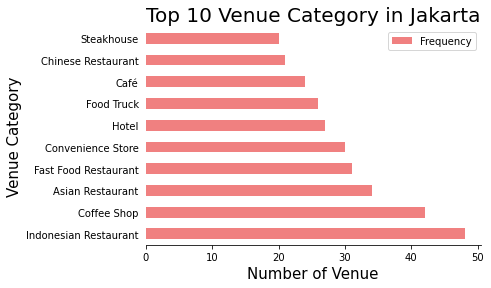

In [42]:
fig = plt.figure(figsize=(12,8))

ax = jkt_venues_top10.plot.barh(x='Venue Category',y='Frequency',color='lightcoral')
ax.set_title('Top 10 Venue Category in Jakarta', fontsize=20)
ax.set_xlabel('Number of Venue', fontsize=15)
ax.set_ylabel('Venue Category', fontsize=15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(which='major', left=False)

fig.tight_layout()

In [18]:
print ("Shape of the Data-Frame with Top 10 Venue Category: ", jkt_venues.shape)
jkt_venues.head()

Shape of the Data-Frame with Top 10 Venue Category:  (755, 7)


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cilandak,-6.289759,106.772842,Sate Padang Talago Biru,-6.288731,106.770937,Food Truck
1,Cilandak,-6.289759,106.772842,Okirobox @ Carrefour Lb. Bulus,-6.287761,106.776271,Japanese Restaurant
2,Cilandak,-6.289759,106.772842,Chatime,-6.287720,106.776384,Bubble Tea Shop
3,Cilandak,-6.289759,106.772842,Imperial Kitchen & Dimsum,-6.287811,106.776385,Asian Restaurant
4,Cilandak,-6.289759,106.772842,Carrefour,-6.287690,106.776346,Supermarket


In [19]:
jkt_venues.columns.tolist()

['District',
 'District Latitude',
 'District Longitude',
 'Venue',
 'Venue Latitude',
 'Venue Longitude',
 'Venue Category']

In [20]:
jkt_onehot = pd.get_dummies(jkt_venues[['Venue Category']], prefix="", prefix_sep="")
jkt_onehot.insert(loc=0, column='District', value=jkt_venues['District'] )
jkt_onehot.shape

(755, 158)

In [21]:
jkt_onehot

,District,Accessories Store,Acehnese Restaurant,Airport Food Court,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,...,Tea Room,Thai Restaurant,Theme Park,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Women's Store
0,Cilandak,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Cilandak,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Cilandak,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Cilandak,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Cilandak,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,Tanah Abang,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
751,Tanah Abang,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
752,Tanah Abang,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
753,Tanah Abang,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
jkt_group = jkt_onehot.groupby('District').mean().reset_index()
jkt_group

,District,Accessories Store,Acehnese Restaurant,Airport Food Court,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,...,Tea Room,Thai Restaurant,Theme Park,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Women's Store
0,Cakung,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000
1,Cempaka Putih,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000
2,Cengkareng,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000
3,Cilandak,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000
4,Cilincing,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000
5,Cipayung,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000
6,Ciracas,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000
7,Duren Sawit,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000
8,Gambir,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.043478,0.000000,...,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000
9,Grogol Petamburan,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000


In [23]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [24]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

districts_venues_sorted = pd.DataFrame(columns=columns)
districts_venues_sorted['District'] = jkt_group['District']

for ind in np.arange(jkt_group.shape[0]):
    districts_venues_sorted.iloc[ind, 1:] = return_most_common_venues(jkt_group.iloc[ind, :], num_top_venues)

districts_venues_sorted.head()

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Cakung,Convenience Store,Cosmetics Shop,Soccer Field,Pizza Place,Women's Store,Donut Shop,Farmers Market,Factory,Event Space,Electronics Store
1,Cempaka Putih,Convenience Store,Indonesian Restaurant,Food & Drink Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Factory,Event Space,Electronics Store,Eastern European Restaurant
2,Cengkareng,Indonesian Restaurant,Noodle House,Asian Restaurant,Café,Women's Store,Fast Food Restaurant,Farmers Market,Factory,Event Space,Electronics Store
3,Cilandak,Coffee Shop,Asian Restaurant,Supermarket,Dog Run,Food & Drink Shop,Food Truck,Japanese Restaurant,Donut Shop,Steakhouse,Sundanese Restaurant
4,Cilincing,Indonesian Meatball Place,Fast Food Restaurant,Restaurant,Indonesian Restaurant,Women's Store,Farmers Market,Factory,Event Space,Electronics Store,Eastern European Restaurant


In [25]:
jakarta_grouped_clustering = jkt_group.drop('District', 1)

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [27]:
max_range = 20 # Maximum range of clusters

In [28]:
from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    jgc = jakarta_grouped_clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(jgc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(jgc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)

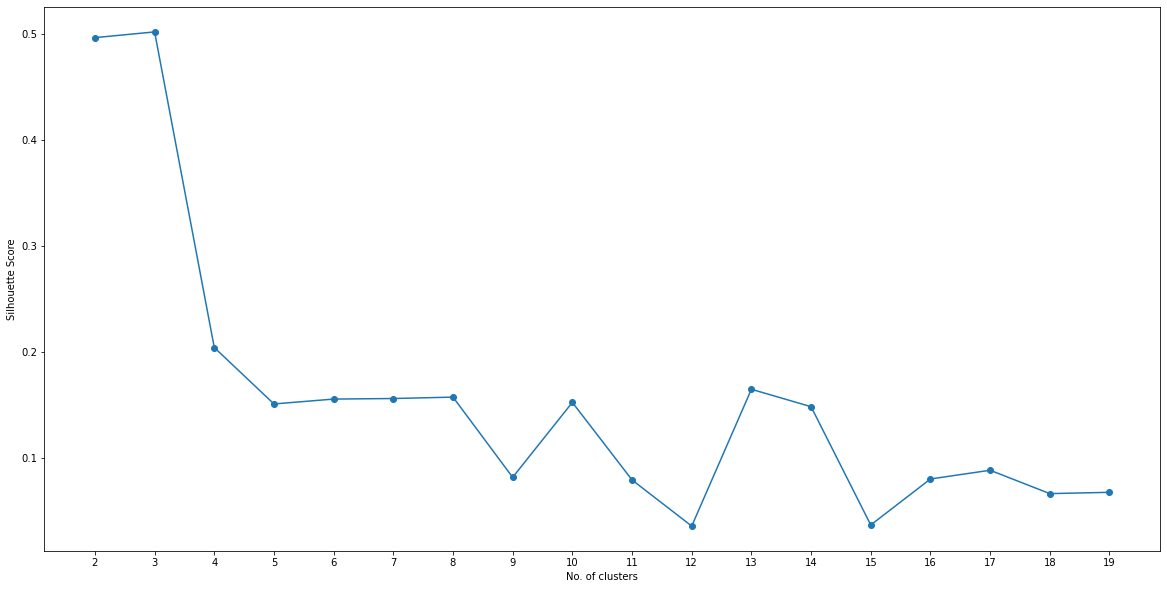

In [38]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

In [30]:
# choose 3 as best k-cluster
kclusters = 3

# Run k-means clustering
jgc = jakarta_grouped_clustering
kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit(jgc)

In [31]:
# Add clustering labels
districts_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [32]:
jakarta_merged = df_jktlatlong
jakarta_merged = jakarta_merged.join(districts_venues_sorted.set_index('District'), on='District')
jakarta_merged.dropna(inplace = True)
jakarta_merged['Cluster Labels'] = jakarta_merged['Cluster Labels'].astype(int)
jakarta_merged.head()

,City,District,Latitude,Longitude,color,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,South Jakarta,Cilandak,-6.289759,106.772842,green,0,Coffee Shop,Asian Restaurant,Supermarket,Dog Run,Food & Drink Shop,Food Truck,Japanese Restaurant,Donut Shop,Steakhouse,Sundanese Restaurant
1,South Jakarta,Jagakarsa,-6.33033,106.790444,green,1,Diner,Dog Run,Fast Food Restaurant,Farmers Market,Factory,Event Space,Electronics Store,Eastern European Restaurant,Donut Shop,Women's Store
2,South Jakarta,Kebayoran Baru,-6.243176,106.783831,green,0,Steakhouse,Coffee Shop,Japanese Restaurant,Café,Dessert Shop,Bakery,BBQ Joint,Korean Restaurant,Indonesian Restaurant,Ice Cream Shop
3,South Jakarta,Kebayoran Lama,-6.249235,106.745362,green,0,Café,Food Truck,Food Court,Comfort Food Restaurant,Miscellaneous Shop,Women's Store,Farmers Market,Factory,Event Space,Electronics Store
4,South Jakarta,Mampang Prapatan,-6.250242,106.804506,green,0,Coffee Shop,Food Truck,Indonesian Restaurant,Japanese Restaurant,BBQ Joint,Restaurant,Noodle House,Sushi Restaurant,Salon / Barbershop,Asian Restaurant


In [40]:
# Create map
map_clusters = folium.Map(location=[-6.2293867, 106.6894297], zoom_start=11)

# Set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(jakarta_merged['Latitude'], jakarta_merged['Longitude'], jakarta_merged['District'], jakarta_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' (Cluster ' + str(cluster + 1) + ')', parse_html=True)
    map_clusters.add_child(
        folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7))
       
map_clusters

In [34]:
jakarta_merged.loc[jakarta_merged['Cluster Labels'] == 0, jakarta_merged.columns[[0] + [1] + list(range(5, jakarta_merged.shape[1]))]]

,City,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,South Jakarta,Cilandak,0,Coffee Shop,Asian Restaurant,Supermarket,Dog Run,Food & Drink Shop,Food Truck,Japanese Restaurant,Donut Shop,Steakhouse,Sundanese Restaurant
2,South Jakarta,Kebayoran Baru,0,Steakhouse,Coffee Shop,Japanese Restaurant,Café,Dessert Shop,Bakery,BBQ Joint,Korean Restaurant,Indonesian Restaurant,Ice Cream Shop
3,South Jakarta,Kebayoran Lama,0,Café,Food Truck,Food Court,Comfort Food Restaurant,Miscellaneous Shop,Women's Store,Farmers Market,Factory,Event Space,Electronics Store
4,South Jakarta,Mampang Prapatan,0,Coffee Shop,Food Truck,Indonesian Restaurant,Japanese Restaurant,BBQ Joint,Restaurant,Noodle House,Sushi Restaurant,Salon / Barbershop,Asian Restaurant
5,South Jakarta,Pancoran,0,Farmers Market,Restaurant,Indonesian Restaurant,American Restaurant,Arcade,Art Gallery,Karaoke Bar,Asian Restaurant,Spa,Pet Service
6,South Jakarta,Pasar Minggu,0,Indonesian Restaurant,Asian Restaurant,Convenience Store,Soup Place,Food Court,Food & Drink Shop,Coffee Shop,Restaurant,Caribbean Restaurant,Café
7,South Jakarta,Pesanggrahan,0,Playground,Donut Shop,Dog Run,Fast Food Restaurant,Farmers Market,Factory,Event Space,Electronics Store,Eastern European Restaurant,Diner
8,South Jakarta,Setiabudi,0,Café,Fast Food Restaurant,Hotel,Gym / Fitness Center,Frozen Yogurt Shop,Music Venue,Department Store,Convenience Store,Grocery Store,Coffee Shop
9,South Jakarta,Tebet,0,Coffee Shop,Café,Shopping Mall,Restaurant,Chinese Restaurant,Hotel,Dim Sum Restaurant,Asian Restaurant,Javanese Restaurant,French Restaurant
10,West Jakarta,Cengkareng,0,Indonesian Restaurant,Noodle House,Asian Restaurant,Café,Women's Store,Fast Food Restaurant,Farmers Market,Factory,Event Space,Electronics Store


In [35]:
jakarta_merged.loc[jakarta_merged['Cluster Labels'] == 1, jakarta_merged.columns[[0] + [1] + list(range(5, jakarta_merged.shape[1]))]]

,City,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,South Jakarta,Jagakarsa,1,Diner,Dog Run,Fast Food Restaurant,Farmers Market,Factory,Event Space,Electronics Store,Eastern European Restaurant,Donut Shop,Women's Store


In [36]:
jakarta_merged.loc[jakarta_merged['Cluster Labels'] == 2, jakarta_merged.columns[[0] + [1] + list(range(5, jakarta_merged.shape[1]))]]

,City,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,West Jakarta,Kalideres,2,Airport Food Court,Women's Store,Donut Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Factory,Event Space,Electronics Store,Eastern European Restaurant


In [37]:
jakarta_merged.loc[jakarta_merged['Cluster Labels'] == 3, jakarta_merged.columns[[0] + [1] + list(range(5, jakarta_merged.shape[1]))]]

,City,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


In [40]:
jakarta_merged.loc[jakarta_merged['Cluster Labels'] == 4, jakarta_merged.columns[[0] + [1] + list(range(5, jakarta_merged.shape[1]))]]

,City,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
